In [1]:
#imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Test-Train Split

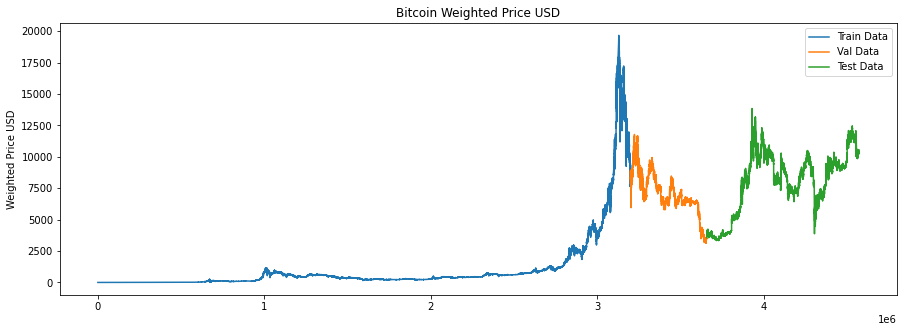

In [2]:
#plot test train data sets
df = pd.read_csv("../data/processed/bitstampUSD.csv")
X = df.drop(["Weighted_Price"], axis=1)
y = df["Weighted_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=(2./3.), shuffle=False)

plt.figure(figsize=(15,5))
plt.plot(y_train)
plt.plot(y_val)
plt.plot(y_test)
plt.title("Bitcoin Weighted Price USD")
plt.ylabel("Weighted Price USD")
plt.legend(["Train Data", "Val Data", "Test Data"])
plt.show()

## Predicted Output

c:\users\mchal\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


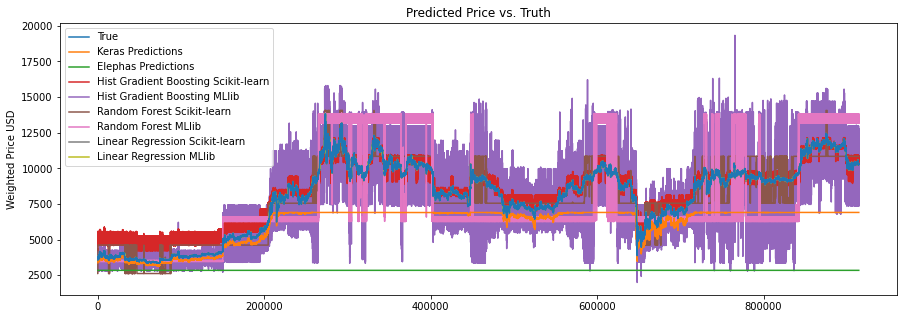

In [7]:
#plot truth vs predicted serial vs predicted parallel
y_true = pd.DataFrame(y_test.reset_index(drop=True))
keras_pred = pd.read_csv("../data/predictions/keras_y_pred.csv")
elephas_pred = pd.read_csv("../data/predictions/elephas_y_pred.csv")
gboost_mllib_pred = pd.read_csv("../data/predictions/gboost_mllib_y_pred.csv")
gboost_sklearn_pred = pd.read_csv("../data/predictions/gboost_sklearn_y_pred.csv")
rf_mllib_pred = pd.read_csv("../data/predictions/rf_mllib_y_pred.csv")
rf_sklearn_pred = pd.read_csv("../data/predictions/rf_sklearn_y_pred.csv")
lr_mllib_pred = pd.read_csv("../data/predictions/lr_mllib_y_pred.csv")
lr_sklearn_pred = pd.read_csv("../data/predictions/lr_sklearn_y_pred.csv")


plt.figure(figsize=(15,5))
plt.plot(y_true, zorder=10)
plt.plot(keras_pred, zorder=9)
plt.plot(elephas_pred, zorder=7)
plt.plot(gboost_sklearn_pred, zorder=2)
plt.plot(gboost_mllib_pred, zorder=1)
plt.plot(rf_sklearn_pred, zorder=3)
plt.plot(rf_mllib_pred, zorder=4)
plt.plot(lr_sklearn_pred, zorder=5)
plt.plot(lr_mllib_pred, zorder=6)
plt.title("Predicted Price vs. Truth")
plt.ylabel("Weighted Price USD")
plt.legend(["True", "Keras Predictions", "Elephas Predictions",
            "Hist Gradient Boosting Scikit-learn", "Hist Gradient Boosting MLlib",
            "Random Forest Scikit-learn", "Random Forest MLlib",
            "Linear Regression Scikit-learn", "Linear Regression MLlib"])
plt.show()

## Model Comparisons

                           MSE          MAE    Fit Time
Model                                                  
Keras             5.511098e+06  1865.264129  373.953386
Elephas           3.244064e+07  5134.340820   60.370270
Linear (mllib)    7.344066e+00     1.765879    5.855333
Linear (sklearn)  4.208642e+01     3.636246    0.359873
GBoost (mllib)    2.059611e+06   977.781580   46.615544
GBoost (sklearn)  4.899271e+05   525.770212    8.651288
RF (mllib)        4.461762e+06  1793.629950   22.749011
RF (sklearn)      8.375208e+05   814.511629  651.001467


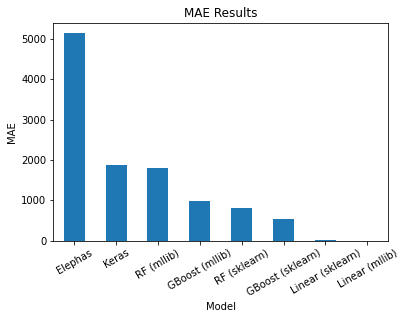

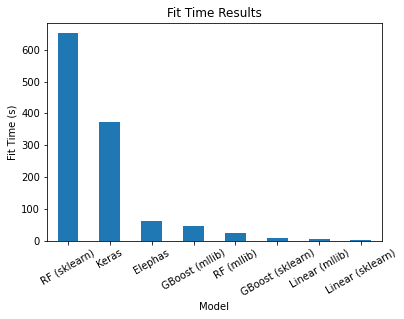

In [6]:
results_df = pd.read_csv("../data/predictions/results.csv")
results_df = results_df.set_index("Model")
print(results_df)

# plot error for each model
mae_results = results_df['MAE'].sort_values(ascending=False)
mae_results.plot(kind="bar")
plt.title("MAE Results")
plt.ylabel("MAE")
plt.xticks(rotation=30)
plt.show()

#plot fit time
fit_time = results_df['Fit Time'].sort_values(ascending=False)
fit_time.plot(kind="bar")
plt.title("Fit Time Results")
plt.ylabel("Fit Time (s)")
plt.xticks(rotation=30)
plt.show()